In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

¿Cómo afecta el nivel de estudios en el salario de les programadores en Argentina?

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Seguir el proceso de análisis propuesto:
Hipótesis: Las personas que participaron en esta encuesta y tiene el universitario completo o superior ganan mas que el promedio.
Análisis de variable aleatoria: 
 -salario
 -nivel de estudio
 - 
Experimento :

In [ ]:
salary_col = 'salary_monthly_NETO'

In [ ]:
avg_salary = df[salary_col].mean()
avg_salary

94907.9491018188

In [ ]:
p_above_avg = len(df[df[salary_col] >= avg_salary]) / len(df)
p_above_avg

0.33125512715340444

In [ ]:
is_above_avg = df[salary_col] > avg_salary
universitario = df.profile_studies_level == 'Universitario'
completo = df.profile_studies_level_state == 'Completado'
posgrado = df.profile_studies_level == 'Posgrado'
doctorado = df.profile_studies_level == 'Doctorado'
posdoctorado = df.profile_studies_level == 'Posdoctorado'

intersection_count = len(df[is_above_avg & ((universitario & completo) | posgrado | doctorado | posdoctorado)])
print(intersection_count)
universitario_o_mas = len(df[((universitario & completo) | posgrado | doctorado | posdoctorado)])
print(universitario_o_mas)
proba_condicional = intersection_count/universitario_o_mas
print(proba_condicional)

893
1992
0.4482931726907631


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


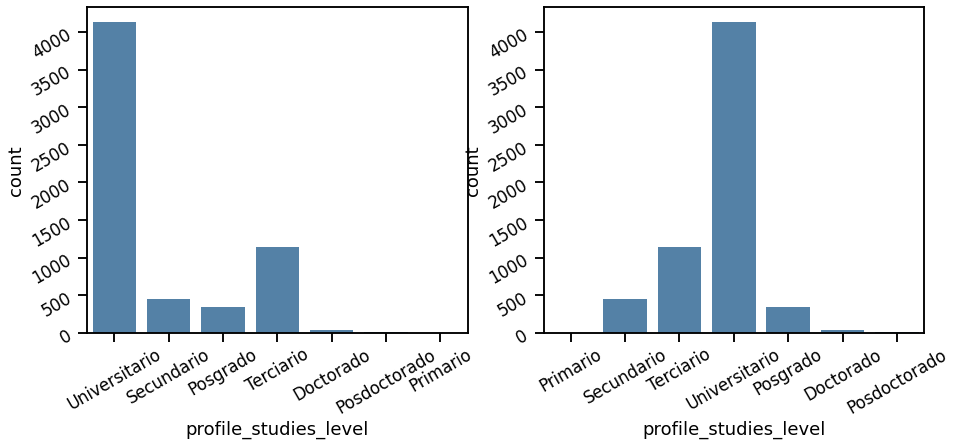

In [ ]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0])
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)